In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from lxml import html

### Access the website https://db-engines.com/en/ranking, perform web scraping, and generate a DataFrame with the list of ranked databases.

In [2]:
url = "https://db-engines.com/en/ranking"
response = requests.get(url)
response.raise_for_status()
tree = html.fromstring(response.text)
rows = tree.cssselect('table.dbi tr')

data = []
for row in rows[3:]:
    cols = row.xpath('./td | ./th')

    if len(cols) >= 6:
        rank = cols[0].text_content().strip().replace('.','')
        name = cols[3].text_content().strip()[0:12]
        score = cols[5].text_content().strip()
        data.append([rank, name, score])
df = pd.DataFrame(data, columns=["Rank", "Database", "Score"])

print(df.head())

  Rank      Database    Score
0    1        Oracle  1212.77
1    2         MySQL   879.66
2    3  Microsoft SQ   715.05
3    4    PostgreSQL   643.20
4    5  MongoDB Deta   368.01


### Using Seaborn, create a bar chart showing the database names and their scores for the current month.

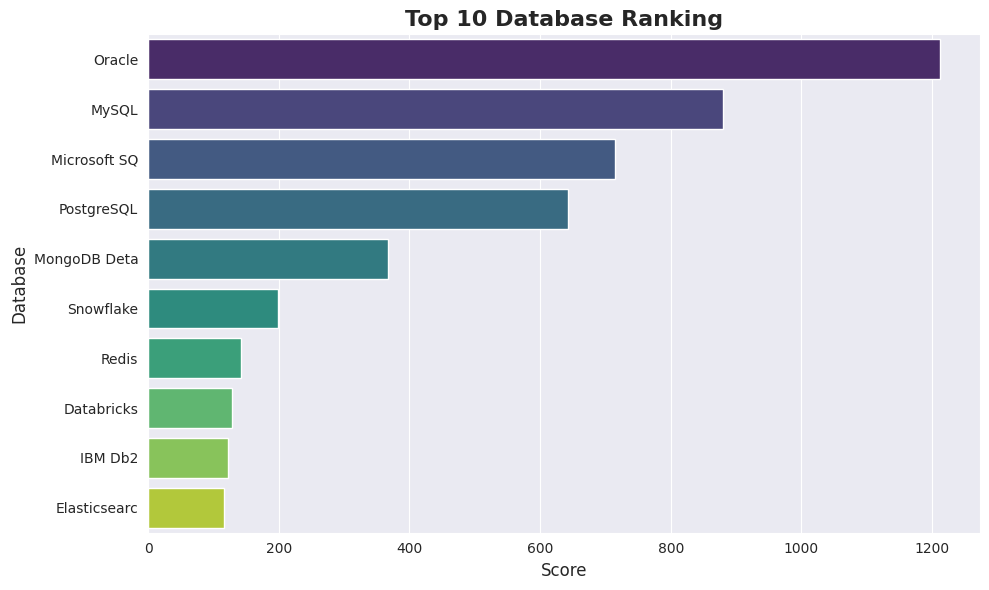

In [16]:
df['Rank'] = pd.to_numeric(df['Rank'], errors='coerce')
df['Score'] = pd.to_numeric(df['Score'], errors='coerce')

plt.figure(figsize=(10, 6))
plt.title('Top 10 Database Ranking', fontsize=16, fontweight='bold')

top10 = df[:10].sort_values('Score', ascending=False)

sns.barplot(x='Score', y='Database', data=top10, hue='Database', palette='viridis', legend=False)

plt.xlabel('Score', fontsize=12)
plt.ylabel('Database', fontsize=12)
plt.tight_layout()
plt.show()

### Create a new DataFrame with only the top 10 databases. Add a column Share showing each database's percentage of relevance relative to the top 10 total scores. Display the name and percentage of the top-ranked database.

In [19]:
df_top_10=df[:10].copy()
total_score=df_top_10['Score'].sum()
df_top_10['Share']=df_top_10['Score']  / total_score * 100
df_top_10[['Database', 'Share']]

,Database,Share
0,Oracle,26.786688
1,MySQL,19.429223
2,Microsoft SQ,15.793449
3,PostgreSQL,14.206484
4,MongoDB Deta,8.128309
5,Snowflake,4.387621
6,Redis,3.143671
7,Databricks,2.844831
8,IBM Db2,2.702810
9,Elasticsearc,2.576913


### Using Matplotlib, create a chart showing the Share of each database among the top 10.

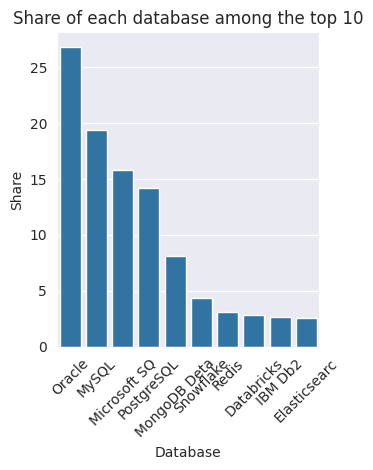

In [20]:
# Create visualizations using Seaborn
plt.subplot(1, 2, 1)
sns.barplot(data=df_top_10, x='Database', y='Share')
plt.title('Share of each database among the top 10')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Alternative: Line plot for vaccinated data
#sns.lineplot(data=data, x='Days', y='Vaccinated', color='red')

### Using the full DataFrame, create a new Share column showing the percentage relevance of each database relative to all others.

In [21]:
total_score_all = df['Score'].sum()

df['Share'] = df['Score'] / total_score_all * 100

print(f"Total databases: {len(df)}")
print(f"Total score (all databases): {total_score_all}")
print("\nFull DataFrame with Share column:")
print(df[['Rank', 'Database', 'Score', 'Share']].head(10))
print(f"\nSum of all shares: {df['Share'].sum():.2f}%")

Total databases: 425
Total score (all databases): 6249.95

Full DataFrame with Share column:
   Rank      Database    Score      Share
0     1        Oracle  1212.77  19.404475
1     2         MySQL   879.66  14.074673
2     3  Microsoft SQ   715.05  11.440892
3     4    PostgreSQL   643.20  10.291282
4     5  MongoDB Deta   368.01   5.888207
5     6     Snowflake   198.65   3.178425
6     7         Redis   142.33   2.277298
7     8    Databricks   128.80   2.060816
8     9       IBM Db2   122.37   1.957936
9    10  Elasticsearc   116.67   1.866735

Sum of all shares: 100.00%


### Save the full DataFrame as a CSV file named db-ranking.csv.

In [ ]:
df.to_csv('db-ranking.csv', index=False)
print(f"DataFrame saved successfully to 'db-ranking.csv'")
print(f"Total rows saved: {len(df)}")

### Use the Brazilian Central Bank’s API to get the USD exchange rate. Retrieve the selling rate for September 16, 2008, using JSON.

In [36]:
date = '09-16-2008'
url = f"https://olinda.bcb.gov.br/olinda/servico/PTAX/versao/v1/odata/CotacaoDolarDia(dataCotacao=@dataCotacao)?@dataCotacao='{date}'&$format=json"

response = requests.get(url)
response.raise_for_status()
data = response.json()

if data['value']:
    exchange_data = data['value'][0]
    selling_rate = exchange_data['cotacaoVenda']

    print(f"USD Exchange Rate for {date}:")
    print(f"Selling Rate (Cotação de Venda): R$ {selling_rate}")
    print(f"\nFull data:")
    print(exchange_data)
else:
    print(f"No data available for {date}")

USD Exchange Rate for 09-16-2008:
Selling Rate (Cotação de Venda): R$ 1.841

Full data:
{'cotacaoCompra': 1.8402, 'cotacaoVenda': 1.841, 'dataHoraCotacao': '2008-09-16 17:36:00.0'}
